# Data Visualisation

## Zipfian curves with varying alpha values (theoretical)

The code below plots Zipfian curves for different alpha values:

`alpha_values = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]`

Zipfian curves with different y-axes


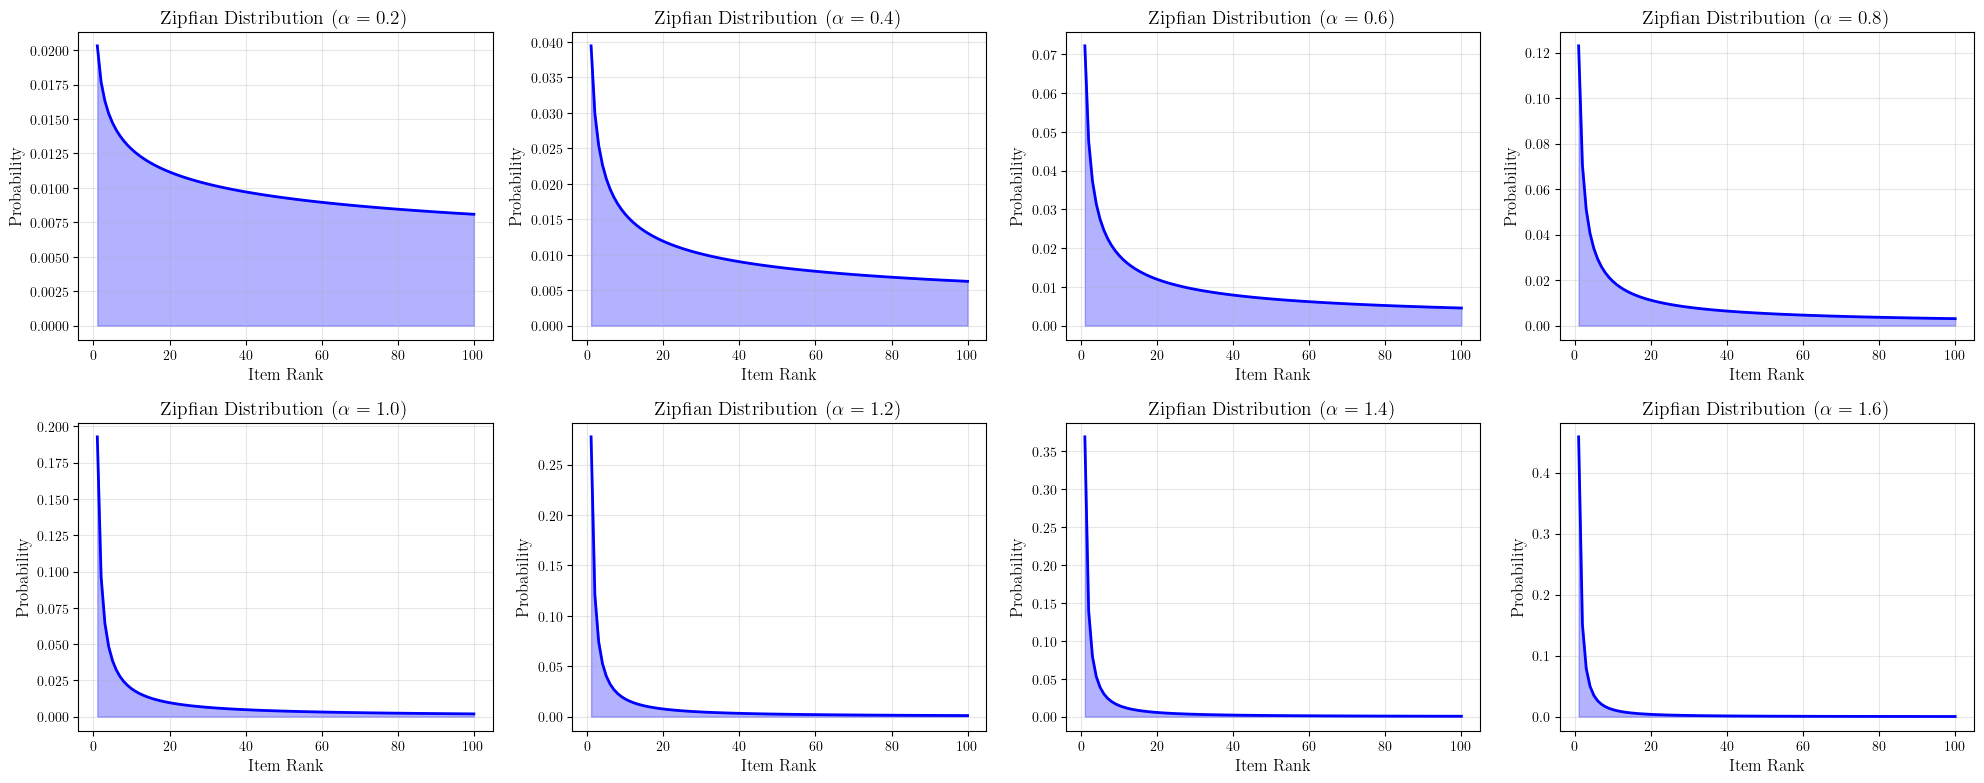

Zipfian curves with the same y-axes


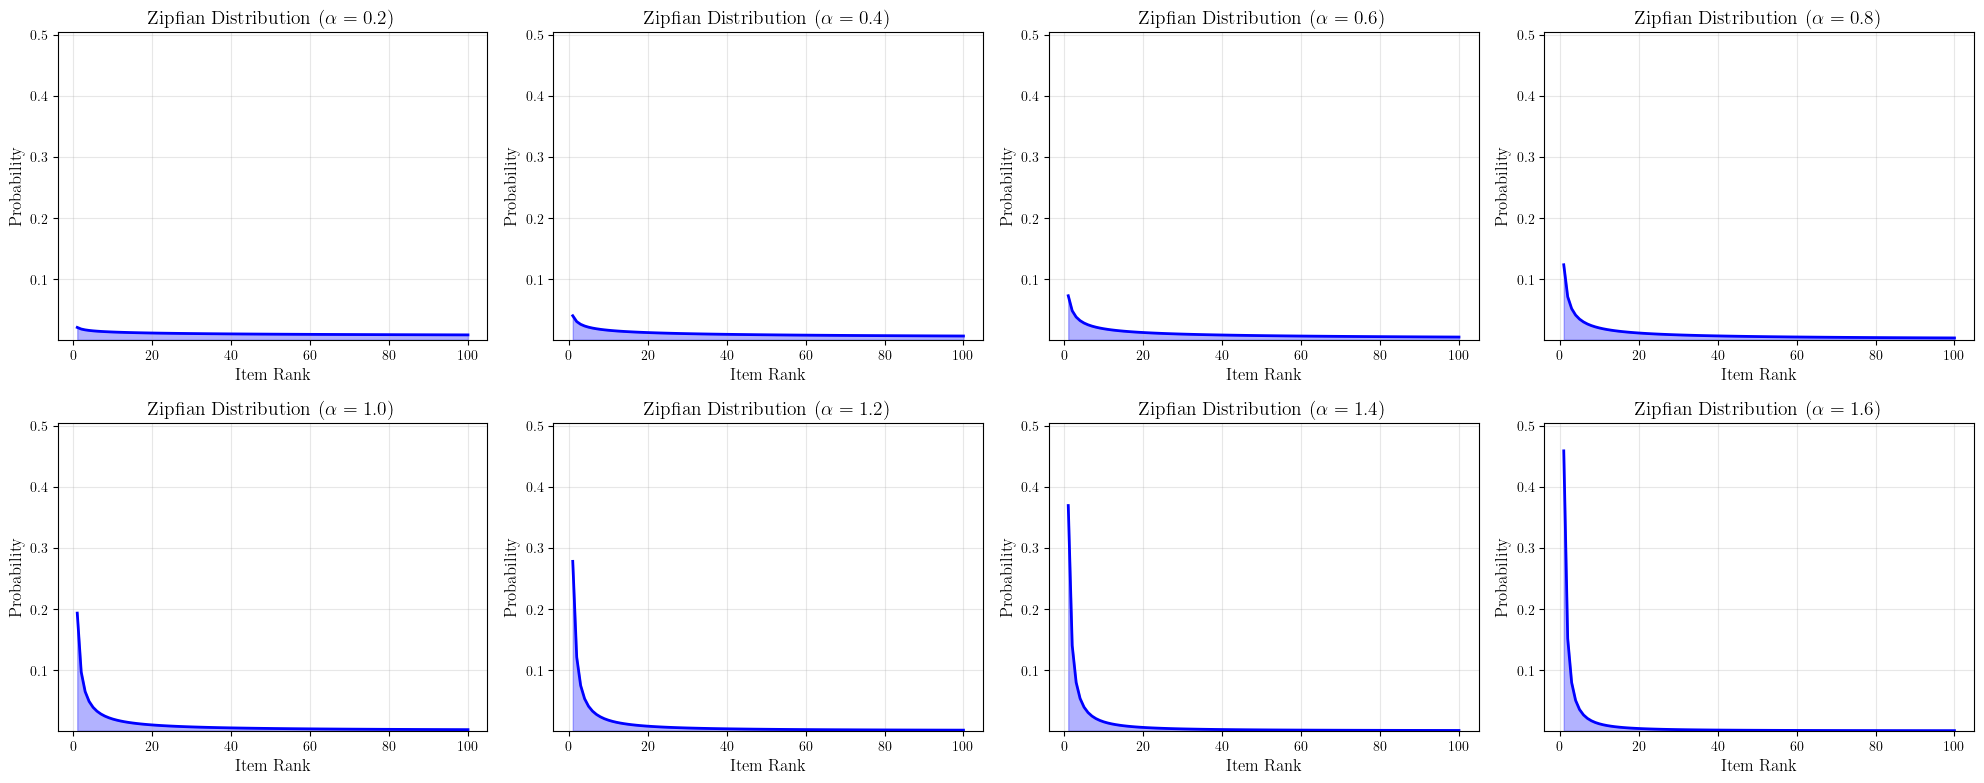

Zipfian curves in one plot


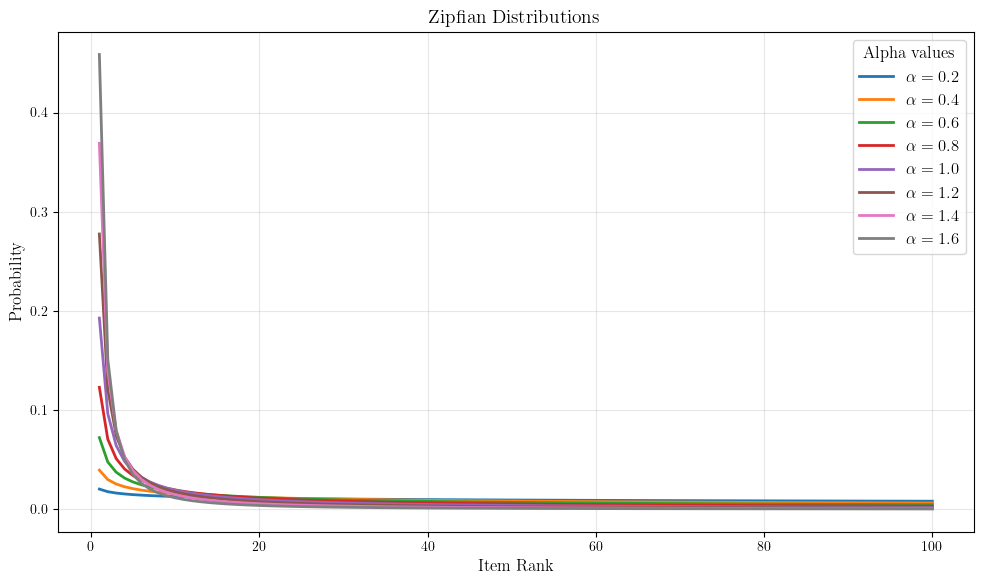

Zipfian curves in one plot with log scale


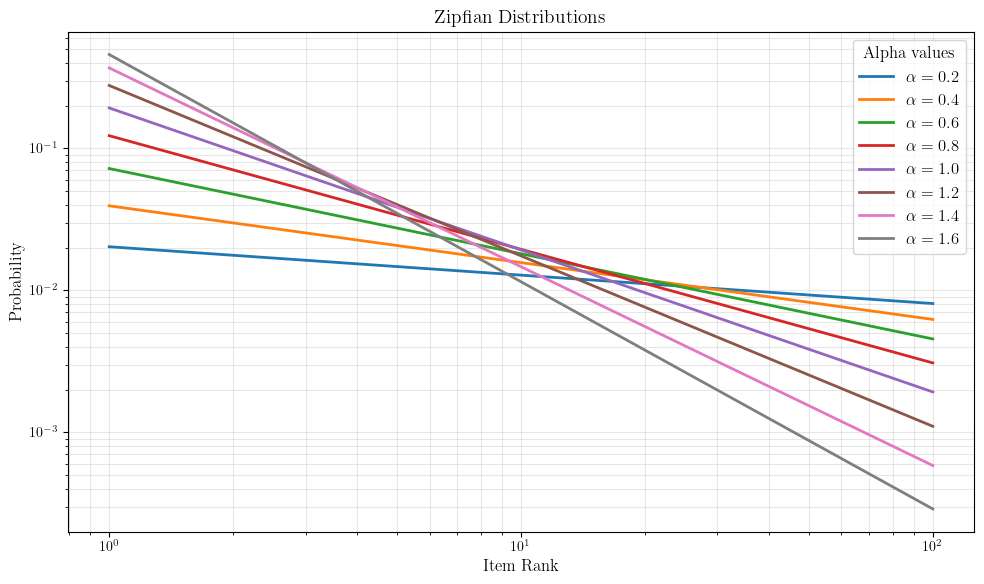

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
from dir_paths import FIGURES_DIR

def plot_separate_zipf_curves(n: int, alpha_values: list[float], global_y_axis: bool = False, save_fig: bool = False) -> None:
    _, axes = plt.subplots(2, 4, figsize=(20, 8))
    axes = axes.flatten()

    all_pmfs = [] # pmf = probability mass function
    x = np.arange(1, n + 1)
    for alpha in alpha_values:
        pmf = x ** (-alpha)
        pmf /= pmf.sum()  # normalize to make it a probability distribution
        all_pmfs.append(pmf)

    # global min and max for y-axis, useful when global_y_axis is true
    y_min = min(np.min(pmf) for pmf in all_pmfs)
    y_max = max(np.max(pmf) for pmf in all_pmfs)

    for idx, alpha in enumerate(alpha_values):
        pmf = all_pmfs[idx]
        
        axes[idx].plot(x, pmf, linewidth=2, color='blue')
        axes[idx].fill_between(x, pmf, alpha=0.3, color='blue')
        
        axes[idx].set_title(f"Zipfian Distribution ($\\alpha={alpha}$)")
        axes[idx].set_xlabel("Item Rank")
        axes[idx].set_ylabel("Probability")
        axes[idx].grid(True, alpha=0.3)

        if (global_y_axis):
            axes[idx].set_ylim(y_min * 0.9, y_max * 1.1)

    plt.tight_layout()

    if (save_fig):
        os.makedirs(FIGURES_DIR, exist_ok=True)
        filename = "zipfian_curves_global_y_axis.pdf" if global_y_axis else "zipfian_curves.pdf"
        plt.savefig(os.path.join(FIGURES_DIR, filename), bbox_inches='tight')

    plt.show()

def plot_all_zipf_curves(n: int, alpha_values: list[float], log_scale: bool = True, save_fig: bool = False) -> None:
    x = np.arange(1, n + 1)
    plt.figure(figsize=(10, 6))
    for alpha in alpha_values:
        pmf = x ** (-alpha)
        pmf /= pmf.sum()
        plt.plot(x, pmf, linewidth=2, label=f"$\\alpha={alpha}$")
    plt.title("Zipfian Distributions")
    plt.xlabel("Item Rank")
    plt.ylabel("Probability")

    if log_scale:
        plt.xscale('log')
        plt.yscale('log')
    
    plt.grid(True, alpha=0.3, which='both')
    plt.legend(title="Alpha values", fontsize=12)
    plt.tight_layout()

    if save_fig:
        os.makedirs(FIGURES_DIR, exist_ok=True)
        plt.savefig(os.path.join(FIGURES_DIR, "zipfian_curves_all.pdf"), bbox_inches='tight')

    plt.show()

# Configure matplotlib to use LaTeX
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12,
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.figsize": [10, 6],
    "savefig.dpi": 300,
    "savefig.format": "pdf"
})

alpha_values = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]
n = 100

print("Zipfian curves with different y-axes")
plot_separate_zipf_curves(n, alpha_values, global_y_axis = False, save_fig = False)
print("Zipfian curves with the same y-axes")
plot_separate_zipf_curves(n, alpha_values, global_y_axis = True, save_fig = False)
print("Zipfian curves in one plot")
plot_all_zipf_curves(n, alpha_values, log_scale = False, save_fig = False) 
print("Zipfian curves in one plot with log scale")
plot_all_zipf_curves(n, alpha_values, log_scale = True, save_fig = False)
